Epoch 1/15, Train Loss: 0.3603, Test Loss: 0.1572, Accuracy: 0.9523
Epoch 2/15, Train Loss: 0.1568, Test Loss: 0.1375, Accuracy: 0.9568
Epoch 3/15, Train Loss: 0.1183, Test Loss: 0.1170, Accuracy: 0.9611
Epoch 4/15, Train Loss: 0.0939, Test Loss: 0.0978, Accuracy: 0.9711
Epoch 5/15, Train Loss: 0.0854, Test Loss: 0.1078, Accuracy: 0.9681
Epoch 6/15, Train Loss: 0.0715, Test Loss: 0.1086, Accuracy: 0.9692
Epoch 7/15, Train Loss: 0.0632, Test Loss: 0.0998, Accuracy: 0.9681
Epoch 8/15, Train Loss: 0.0574, Test Loss: 0.0803, Accuracy: 0.9763
Epoch 9/15, Train Loss: 0.0500, Test Loss: 0.0876, Accuracy: 0.9757
Epoch 10/15, Train Loss: 0.0455, Test Loss: 0.0917, Accuracy: 0.9725
Epoch 11/15, Train Loss: 0.0435, Test Loss: 0.0843, Accuracy: 0.9778
Epoch 12/15, Train Loss: 0.0390, Test Loss: 0.0825, Accuracy: 0.9775
Epoch 13/15, Train Loss: 0.0363, Test Loss: 0.0844, Accuracy: 0.9779
Epoch 14/15, Train Loss: 0.0326, Test Loss: 0.0673, Accuracy: 0.9819
Epoch 15/15, Train Loss: 0.0333, Test Loss:

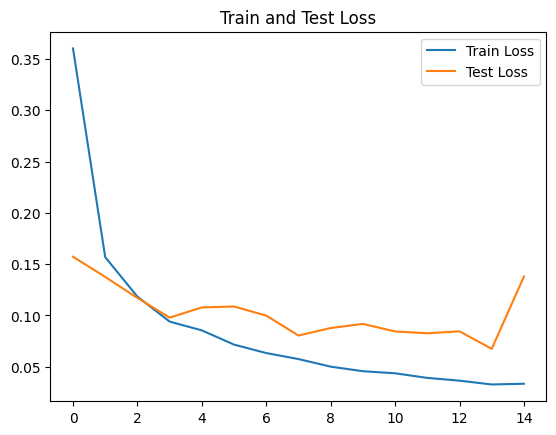

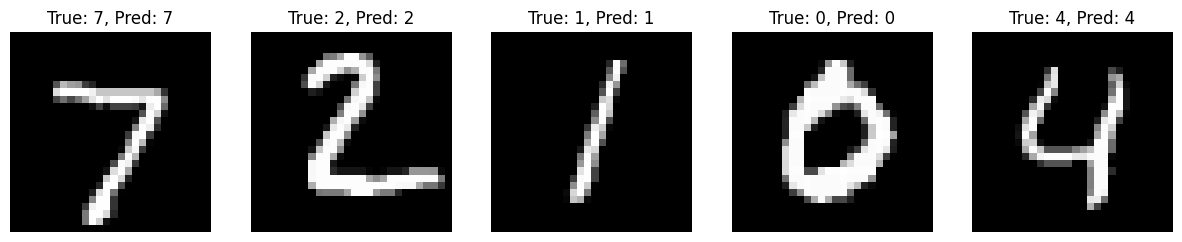

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.softmax(self.fc5(x))
        return x

model = NeuralNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 15
train_losses, test_losses = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    model.eval()
    test_loss = 0.0
    correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    accuracy = correct / len(test_dataset)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.4f}")

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Train and Test Loss')
plt.show()

model.eval()
examples = iter(test_loader)
images, labels = next(examples)

with torch.no_grad():
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for i in range(5):
    axes[i].imshow(images[i].view(28, 28), cmap='gray')
    axes[i].set_title(f"True: {labels[i]}, Pred: {predictions[i]}")
    axes[i].axis('off')

plt.show()
